In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 zero_padding2d_3 (ZeroPadding2  (None, 38, 38, 3)   0           ['input_5[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 16, 16, 64)   9408        ['zero_padding2d_3[0][0]']       
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1/conv[0][0]']   

2023-03-30 19:42:33.707042: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_3/sequential_2/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-03-30 19:42:34.635671: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_5/model_3/sequential_2/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


0 [Discriminator loss: 2.084605, acc_real: 37.50%, acc_fake: 15.62%] [Generator loss: 0.702177]
1/1 [==============================] - 0s 118ms/step


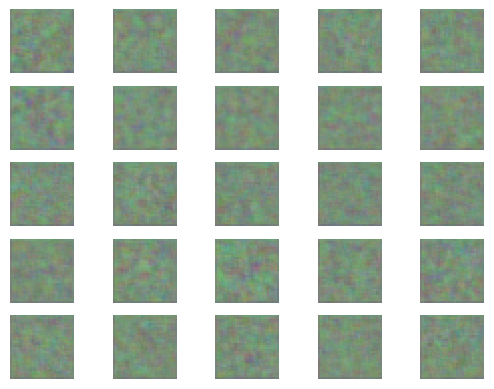

1/1 [==============================] - 0s 18ms/step
1 [Discriminator loss: 1.522566, acc_real: 59.38%, acc_fake: 43.75%] [Generator loss: 0.739749]
1/1 [==============================] - 0s 17ms/step
2 [Discriminator loss: 1.496947, acc_real: 65.62%, acc_fake: 40.62%] [Generator loss: 0.780796]
1/1 [==============================] - 0s 18ms/step
3 [Discriminator loss: 1.203803, acc_real: 53.12%, acc_fake: 78.12%] [Generator loss: 0.789317]
1/1 [==============================] - 0s 19ms/step
4 [Discriminator loss: 0.891639, acc_real: 65.62%, acc_fake: 93.75%] [Generator loss: 0.798291]
1/1 [==============================] - 0s 19ms/step
5 [Discriminator loss: 0.792863, acc_real: 68.75%, acc_fake: 100.00%] [Generator loss: 0.708823]
1/1 [==============================] - 0s 19ms/step
6 [Discriminator loss: 0.739604, acc_real: 81.25%, acc_fake: 96.88%] [Generator loss: 0.591645]
1/1 [==============================] - 0s 17ms/step
7 [Discriminator loss: 0.695803, acc_real: 81.25%, acc_fake

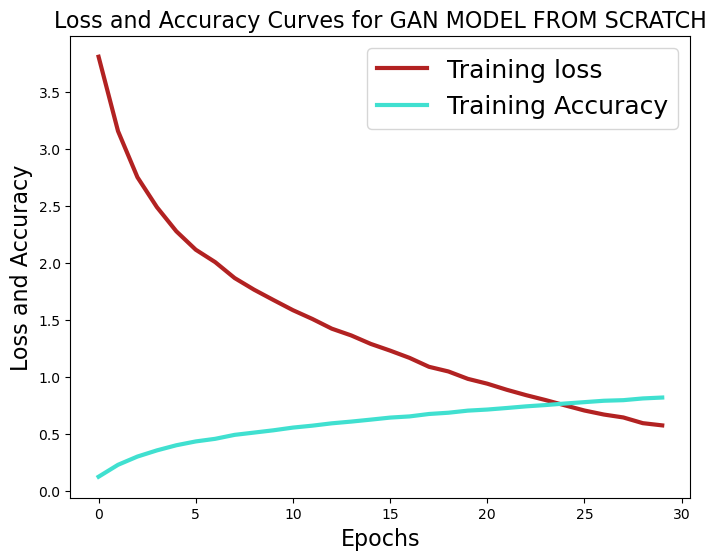

In [3]:
#importing the libraries
import numpy as np
import sklearn.metrics as metrics
from keras.applications import densenet
from keras.datasets import cifar100
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras import initializers
# create the model from keras and set weights=None for training from scratch
model = densenet.DenseNet121(weights=None, input_shape=(32,32,3), pooling=None, classes=100)
# printing the model summary
model.summary()
# Splitting training and testing set
(cifarx_train, cifary_train), (cifarx_test, cifary_test) = cifar100.load_data()
# Converting to float
cifarx_train = cifarx_train.astype('float32')
cifarx_test = cifarx_test.astype('float32')
# converting data into normalize form
cifarx_train = densenet.preprocess_input(cifarx_train)
cifarx_test = densenet.preprocess_input(cifarx_test)
# one-hot encoding
cifarY_train = np_utils.to_categorical(cifary_train, 100)
cifarY_test = np_utils.to_categorical(cifary_test, 100)
# Defining the generator model for GAN
def Gan_build_generator():
    model = Sequential()
    model.add(Dense(128 * 8 * 8, activation="relu", input_dim=100))
    model.add(Reshape((8, 8, 128)))
    model.add(BatchNormalization(momentum=0.8))
    model.add(UpSampling2D())
    model.add(Conv2D(128, kernel_size=3, padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(UpSampling2D())
    model.add(Conv2D(64, kernel_size=3, padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Conv2D(3, kernel_size=3, padding="same"))
    model.add(Activation("tanh"))
    noise = Input(shape=(100,))
    img = model(noise)
    return Model(noise, img)
# Defining the discriminator model for GAN
def Gan_build_discriminator():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=(32, 32, 3), padding="same"))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
    model.add(ZeroPadding2D(padding=((0,1),(0,1))))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    img = Input(shape=(32, 32, 3))
    validity = model(img)
    return Model(img, validity)
# Compiling the discriminator model
discriminator = Gan_build_discriminator()
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(0.0002, 0.5),
                      metrics=['accuracy'])
# Compiling the generator model
generator = Gan_build_generator()
# The generator takes noise as input and generates images
z = Input(shape=(100,))
img = generator(z)
# Training the generator
discriminator.trainable = False
# Discriminator taking generated images as input and checking validity
valid = discriminator(img)
combined = Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))
# declaring hyperparameters
epochs =50
batch_size = 32
save_interval = 1000
# Training the GAN model
for epoch in range(epochs):
    # Training discriminator with real images
    idx = np.random.randint(0, cifarx_train.shape[0], batch_size)
    real_imgs = cifarx_train[idx]
    real_labels = np.ones((batch_size, 1))
    discriminator_loss_real = discriminator.train_on_batch(real_imgs, real_labels)
# Training discriminator with fake images
    noise = np.random.normal(0, 1, (batch_size, 100))
    fake_imgs = generator.predict(noise)
    fake_labels = np.zeros((batch_size, 1))
    discriminator_loss_fake = discriminator.train_on_batch(fake_imgs, fake_labels)
# Training generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    valid_y = np.array([1] * batch_size)
    generator_loss = combined.train_on_batch(noise, valid_y)
# describing the progress
    print ("%d [Discriminator loss: %f, acc_real: %.2f%%, acc_fake: %.2f%%] [Generator loss: %f]" % (epoch, discriminator_loss_real[0]+discriminator_loss_fake[0], 100*discriminator_loss_real[1], 100*discriminator_loss_fake[1], generator_loss))
    if epoch % save_interval == 0:
        # show images from the generator
        noise = np.random.normal(0, 1, (25, 100))
        gen_imgs = generator.predict(noise)
        gen_imgs = 0.5 * gen_imgs + 0.5
        # Plot the generated images
        fig, axs = plt.subplots(5, 5)
        counter = 0
        for i in range(5):
            for j in range(5):
                axs[i,j].imshow(gen_imgs[counter, :,:,:])
                axs[i,j].axis('off')
                counter += 1
        plt.show()
# Using Adam and set learning rate 0.001
optimizer = Adam(lr=0.001)  
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])
history = model.fit(datagen_train.flow(cifarx_train, cifarY_train, batch_size=64, shuffle=True), 
                    steps_per_epoch=len(cifarx_train)/64, epochs=30, validation_data=(cifarx_test, cifarY_test))
# Evaluate the model
scores = model.evaluate(cifarx_test, cifarY_test, verbose=0)
print(" the test accuracy is : %.2f%%" % (scores[1]*100))
# Define plotchart function
def plotchart(history, value):
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'], 'firebrick', linewidth=3.0)
    plt.plot(history.history['accuracy'], 'turquoise', linewidth=3.0)
    plt.legend(['Training loss', 'Training Accuracy'], fontsize=18)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Loss and Accuracy', fontsize=16)
    plt.title('Loss and Accuracy Curves for {}'.format(value), fontsize=16)
    plt.show()
# Plot the training history
plotchart(history, 'GAN MODEL FROM SCRATCH')

